## <h1 align="center">Actividad 2: Agrupar datos textuales con el Modelo de Tópicos y el algoritmo Latent Dirichlet Allocation (LDA)</h3>

In [1]:
!python -V

Python 3.6.4 :: Anaconda custom (64-bit)


<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<h2> Preámbulo</h2>
<p> Esta actividad se inspira de ejercicios disponibles en los recursos siguientes:<p>
<ul>
    <li>Biblioteca <a href="http://scikit-learn.org/stable/install.html/">SciKit-learn</a> de Python</li>
    <li>Código disponible en  <a href="https://github.com/lda-project/lda/">lda-project</a></li>
</ul>
<p> La actividad requiere el uso de Python 3.x y <a href="http://jupyter.org/install">Jupyter Notebook</a>. El código entregado fue probado con Python 3.6.1. Para saber cuál versión de Python usted está utilizando, ejecutar la celda siguiente (está información es importante cuando se necesitará instalar nuevos paquetes.)
</p>
</div>

<div style="border: 2px solid #D24747; background-color:#F8B4B4">
<h2>Objetivos de la actividad</h2>
<p>El <b>objetivo general</b> de esta actividad consiste en saber explorar la estructura oculta de un conjunto de datos textuales.</p>
<p> Comenzaremos por utilizar un  algoritmo de clustering tradicional como Kmeans para explorar datos textuales, considerando la medida tf-idf por cada término presente en cada texto, para caracterizar los textos y construir distancias entre ellos.</p>
<p>En una segunda fase utilizaremos el <a href="https://drive.google.com/open?id=1rSQPJvRVj0V_IChzspQMRPNwlDTkHYHp"> Modelo Probabilista De Tópicos </a> para descubrir tópicos en los textos. Para ello se utilizará el algoritmo de asignación de tópicos latentes conocido como <a href= "https://drive.google.com/open?id=1BobImO3192hifZPLXowd14gryVAUzBPW">Latent Dirichlet Allocation (LDA)</a>. El enfoque es probabilista, por lo que el resultado del algoritmo es descubrir tópicos en los textos (el número de tópicos es definido por el analista) y asignar una distribución de probabilidad de tópicos en cada texto.</p>  Dependiendo del tamaño de los textos, es también posible agruparlos de acuerdo al tópico con mayor representación en cada uno, lo que permitirá comparar esta metodología con los algoritmos de clustering clásicos.</p> </div>
    
  

<div style="border: 2px solid #D24747; background-color:#F8B4B4">
<p>En el primer ejemplo se busca encontrar estructuras ocultas en el discurso de Donald Trump. Con este objetivo, vamos a utilizar un dataset de 297 tweets publicados por Donald Trump entre el 5 diciembre 2016 y el 27 de enero 2017 (aproximadamente 1 mes después su elección).</p>   
<p>El primer paso es la lectura de datos: </p></div>

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Cargar el dataset de tweets
df_tweets = pd.read_csv('datasets/trump_tweets.csv')
df_tweets

,Date,Time,Tweet,Tweetid
0,2016-12-05 13:53:11+00:00,13:53:11,I am thrilled to nominate Dr. @RealBenCarson a...,805772007220645000
1,2016-12-05 16:00:27+00:00,16:00:27,If the press would cover me accurately &amp; h...,805804034309427000
2,2016-12-05 23:06:43+00:00,23:06:43,#ThankYouTour2016 \r\n\r\n12/6- North Carolina...,805911307270713000
3,2016-12-06 13:52:35+00:00,13:52:35,Boeing is building a brand new 747 Air Force O...,806134244384899000
4,2016-12-06 16:45:27+00:00,16:45:27,"Join me tonight in Fayetteville, North Carolin...",806177746397306000
5,2016-12-06 19:09:49+00:00,19:09:49,Masa (SoftBank) of Japan has agreed to invest ...,806214078465245000
6,2016-12-06 19:10:27+00:00,19:10:27,Masa said he would never do this had we (Trump...,806214236053667000
7,2016-12-06 21:17:45+00:00,21:17:45,Departing New York with General James 'Mad Dog...,806246271405162000
8,2016-12-07 03:33:20+00:00,3:33:20,"A great night in Fayetteville, North Carolina....",806340792247795000
9,2016-12-07 12:18:56+00:00,12:18:56,I will be interviewed on the @TODAYshow at 7:3...,806473064703725000


In [3]:
#selección de los mensajes
docs = df_tweets["Tweet"].as_matrix()
len(docs)


297

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import adjusted_rand_score

stemmer = SnowballStemmer("english")

# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/roberto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/roberto/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


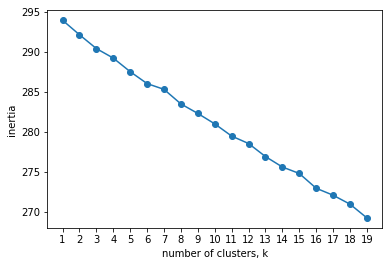

In [5]:
#Utilizando Kmeans y tf-idf para realizar un primer agrupamiento de los mensajes
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

vectorizer = TfidfVectorizer(stop_words='english',tokenizer=tokenize_and_stem, ngram_range=(1,2))
X = vectorizer.fit_transform(docs)
num_k = range(1, 20)
inertias = []

for k in num_k:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, n_init=10)

    # Fit model to samples
    model.fit(X)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)



# Plot ks vs inertias
plt.plot(num_k, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(num_k)
plt.show()

<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<p>Pregunta Nº1: Explore las clases TfidfVectorizer, CountVectorizer. ¿Qué rol cumplen? ¿Qué tratamiento premilinar de textos se ha hecho en este caso? Qué rol cumple n-gram? </p>
<p>Pregunta Nº2: A partir del gráfico, justifique el número de clusters para estos datos.</p>
</div>

## Respuestas:

1. TfidfVectorizer convierte las instancia de textos en una matriz, CountVectorizer convierte las instancias de texto en una matriz de token.

2. La cantidad de cluster es 6, ya que es donde en la gráfica se observa un aumento negativo de la pendiente.

Top terms per cluster:
Cluster 0: great peopl today time make n't 20th support forward look forward big look hillari thing world
Cluster 1: job vote nation bring mani thank democrat obama presid amp state unit say new great
Cluster 2: https thankyoutour2016 join thank ticket https ticket happi trump rt tonight north happi birthday birthday mobil donaldjtrumpjr
Cluster 3: veri media foxnew u.s. dishonest n't know dishonest media great interview year n't know million mexico just
Cluster 4: act said care obamacar increas afford longer dem care act season elect thing blame whi lie
Cluster 5: news fake news fake intellig live peopl hack public germani allow becaus today report total fact


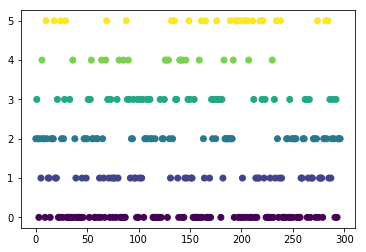

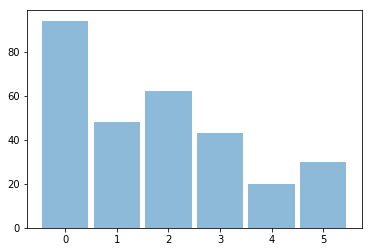

In [6]:
from matplotlib.pylab import hist, show
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=10)
model.fit(X)
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    cluster_words = np.array(terms)[order_centroids[i, :15]]
    print('Cluster {}: {}'.format(i, ' '.join(cluster_words)))

#Generando algunos gráficos de los resultados
labels = model.predict(X)
plt.scatter(range(297),labels,c=labels)
show()
hist(labels,bins=np.arange(-0.5,5.6,1),alpha=0.5,rwidth=0.9)
show()

                                    

<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<p>Pregunta Nº2:Explore diversos valores en los parametros n_init y max_iter. ¿Tienen influencia en los resultados? Describa e interprete los resultados.</p></div>

## Respuesta:

2. los grupos obtenidos son similares entre ellos, se logran identificar tópicos del cumpleaños, las relaciones con mexico y las noticias falsas. se nota un aumento en tiempo de ejecución del algortimo.



<div style="border: 2px solid #1c75c8; background-color: #F8B4B4">
<p>En lo que sigue se construye un modelo probabilista de tópicos, considerando 9 tópicos (para comparar con Kmeans
 y el algoritmo LDA estimado con el <a href="https://drive.google.com/open?id=1AoCcmg91Y1yRwM_Ox4Nvf6PGSQ9TybpE">, método de Bayes Variacional</a>, disponible como desarrollo en <a href="http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html">sklearn-lda.</a></p> 
Previo a ello se utiliza la clase CountVectorizer y su función fit_transform que permite construir una matriz tf (DTM, Document-Term Matrix) que contiene la frecuencia de aparición de cada término del vocabulario en cada texto analizado. En la definición de la clase se especifica que:
<ol>
    <li>los términos que  aparecen sólo una vez en algún texto no serán considerados en el vocabulario (min_df=2)</li>
    <li> los términos que  aparecen en mas del 95% de los textos no serán considerados en el vocabulario (max_df=0.95)</li>
    <li> se utilizará un conjunto de stop words del inglés </li>
</ol></div>

In [12]:
#Aplicando Modelos Probabilistas de Tópicos y LDA
from sklearn.decomposition import LatentDirichletAllocation

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                stop_words='english',tokenizer=tokenize_only, ngram_range=(1,2))
tf = tf_vectorizer.fit_transform(docs)
diccionario= tf_vectorizer.get_feature_names()


#Estimación de LDA con Bayes Variacional
lda = LatentDirichletAllocation(n_components=true_k, max_iter=2,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

lda.fit(tf)
#Cálculo de índice de ajuste de los datos
print(lda.perplexity(tf))
print("\nTopics in LDA model:")
print_top_words(lda, diccionario, 10)


2350.0847293936195

Topics in LDA model:
Topic #0: great https u.s. paid dems massive mexico realdonaldtrump wall going
Topic #1: https thank bring time n't jobs election states did vote
Topic #2: ceo u.s. https general motors general motors today meeting great bad
Topic #3: terrible president https president obama happy obama happy birthday weak said released
Topic #4: https news great day fake fake news 's big today people
Topic #5: people https america just new jobs u.s. amp american tonight



<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<p>Pregunta Nº4: Indage sobre la medida perplexity, ¿Cómo se interpreta el valor obtenido?
</p></div>

## Respuesta:

4. Es utlizada para comparar los modelos.

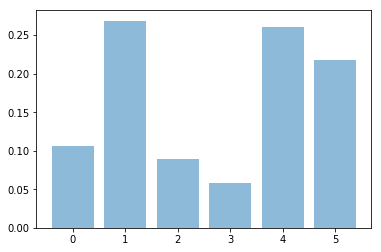

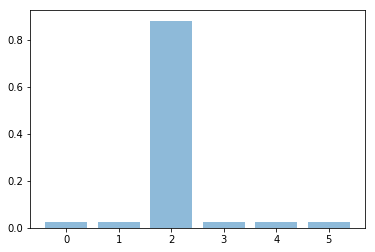

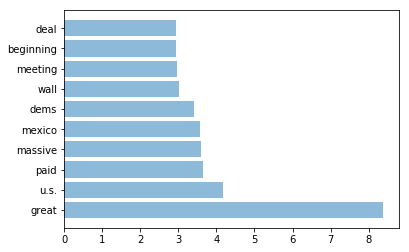

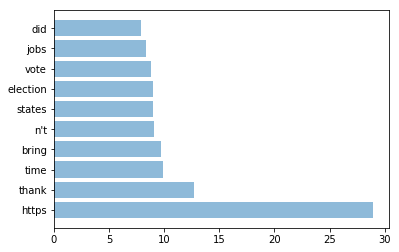

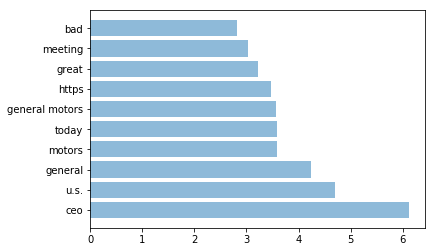

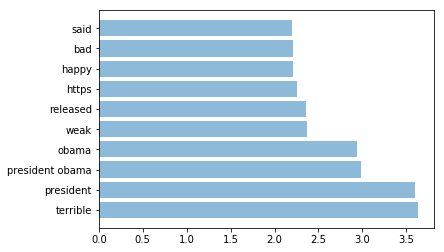

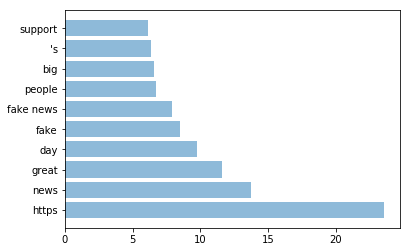

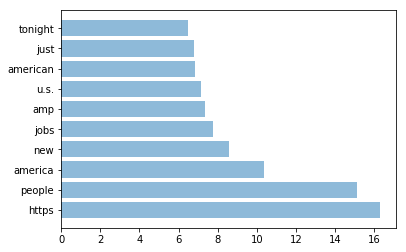

In [8]:
#Generando algunos gráficos de los resultados
from matplotlib.pylab import hist, show
import seaborn as sns

y=lda.fit_transform(tf)

#distribución de tópicos en todos los documentos
dist = sum(y)/len(docs)
w=np.arange(0,true_k)
plt.bar(w,height=dist,alpha=0.5,tick_label=w)
show()
#distribución de tópicos en el documento 100
plt.bar(w,height=y[100],alpha=0.5,tick_label=w)
show()


#frecuencia de palabras por tópico
n_top_words=10
numo =np.arange(0,n_top_words)
for idx,topic in enumerate(lda.components_):
    d =[]
    s = []
    for i in topic.argsort()[:-n_top_words - 1:-1]:
          s.append(diccionario[i])
          d.append(topic[i])
    
    plt.barh(numo,width=d,alpha=0.5,tick_label=s)
    show()


<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<p>Pregunta Nº5: Interprete estos gráficos. 
</p></div>

## Respuesta:

Se observa que los tópicos más comunen son el 1 y el 4, donde las palabras claves para cada tópico son:

* T1: mexico paga
* T2: elecciones
* T3: general motors
* T4: presidente obama
* T5: fakes news
* T6: people america

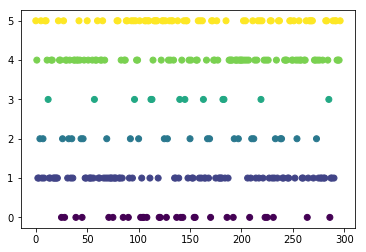

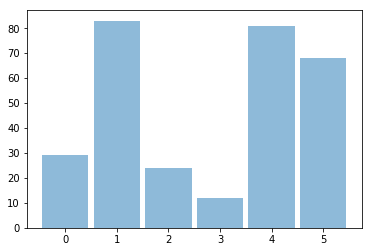

In [9]:
#calculando cluster en base al tópico mas frecuente
z=[]
for i in range(len(docs)):
    z.append(np.argmax(y[i]))
plt.scatter(range(297),z,c=z)

#distribución de cluster de acuerdo al cálculo anterior
show()
hist(z,bins=np.arange(-0.5,5.6,1),alpha=0.5,rwidth=0.9)#,density=True)
show()


<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<p>Pregunta Nº6: ¿Cómo se comparan estos resultados con los de  Kmeans?
</p></div>


## Respuesta:

los grupos son similares

<div style="border: 2px solid #1c75c8; background-color: #F8B4B4">
<p>Una nueva estimación para algoritmo LDA considerando <a href="https://drive.google.com/open?id=1oSRRvG_W0UaH0l4o9f5ClEyWuGY1j-s0"> Gibbs Sampling</a>, disponible como desarrollo en <a href="https://github.com/lda-project/lda/">lda-project.</a></p> 
</div>

In [10]:
import lda

model = lda.LDA(n_topics=true_k, n_iter=5000, alpha=0.1, eta=0.1, random_state=3)
model.fit(tf)  # model.fit_transform(X) is also available

topic_word = model.topic_word_  # model.components_ also works
n_top_words=10
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(diccionario)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))
    


INFO:lda:n_documents: 297
INFO:lda:vocab_size: 655
INFO:lda:n_words: 2598
INFO:lda:n_topics: 6
INFO:lda:n_iter: 5000
/Users/roberto/anaconda3/lib/python3.6/site-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:lda:<0> log likelihood: -25028
INFO:lda:<10> log likelihood: -17939
INFO:lda:<20> log likelihood: -17629
INFO:lda:<30> log likelihood: -17533
INFO:lda:<40> log likelihood: -17521
INFO:lda:<50> log likelihood: -17368
INFO:lda:<60> log likelihood: -17381
INFO:lda:<70> log likelihood: -17339
INFO:lda:<80> log likelihood: -17305
INFO:lda:<90> log likelihood: -17362
INFO:lda:<100> log likelihood: -17321
INFO:lda:<110> log likelihood: -17376
INFO:lda:<120> log likelihood: -17384
INFO:lda:<130> log likelihood: -17337
INFO:lda:<140> log likelihood: -17319
INFO:lda:<150> log l

INFO:lda:<2030> log likelihood: -17182
INFO:lda:<2040> log likelihood: -17132
INFO:lda:<2050> log likelihood: -17235
INFO:lda:<2060> log likelihood: -17142
INFO:lda:<2070> log likelihood: -17268
INFO:lda:<2080> log likelihood: -17140
INFO:lda:<2090> log likelihood: -17223
INFO:lda:<2100> log likelihood: -17173
INFO:lda:<2110> log likelihood: -17091
INFO:lda:<2120> log likelihood: -17110
INFO:lda:<2130> log likelihood: -17178
INFO:lda:<2140> log likelihood: -17173
INFO:lda:<2150> log likelihood: -17167
INFO:lda:<2160> log likelihood: -17178
INFO:lda:<2170> log likelihood: -17183
INFO:lda:<2180> log likelihood: -17163
INFO:lda:<2190> log likelihood: -17125
INFO:lda:<2200> log likelihood: -17166
INFO:lda:<2210> log likelihood: -17169
INFO:lda:<2220> log likelihood: -17071
INFO:lda:<2230> log likelihood: -17103
INFO:lda:<2240> log likelihood: -17215
INFO:lda:<2250> log likelihood: -17146
INFO:lda:<2260> log likelihood: -17158
INFO:lda:<2270> log likelihood: -17097
INFO:lda:<2280> log likel

INFO:lda:<4140> log likelihood: -17107
INFO:lda:<4150> log likelihood: -17063
INFO:lda:<4160> log likelihood: -17151
INFO:lda:<4170> log likelihood: -17177
INFO:lda:<4180> log likelihood: -17159
INFO:lda:<4190> log likelihood: -17182
INFO:lda:<4200> log likelihood: -17128
INFO:lda:<4210> log likelihood: -17158
INFO:lda:<4220> log likelihood: -17178
INFO:lda:<4230> log likelihood: -17163
INFO:lda:<4240> log likelihood: -17139
INFO:lda:<4250> log likelihood: -17218
INFO:lda:<4260> log likelihood: -17163
INFO:lda:<4270> log likelihood: -17155
INFO:lda:<4280> log likelihood: -17142
INFO:lda:<4290> log likelihood: -17090
INFO:lda:<4300> log likelihood: -17136
INFO:lda:<4310> log likelihood: -17136
INFO:lda:<4320> log likelihood: -17074
INFO:lda:<4330> log likelihood: -17238
INFO:lda:<4340> log likelihood: -17089
INFO:lda:<4350> log likelihood: -17142
INFO:lda:<4360> log likelihood: -17116
INFO:lda:<4370> log likelihood: -17199
INFO:lda:<4380> log likelihood: -17043
INFO:lda:<4390> log likel

Topic 0: today time united 20th january results people january 20th talk president
Topic 1: https great thank make america trump going d.c. amp forward
Topic 2: n't just great people election states amp did vote wrong
Topic 3: u.s. big jobs mexico new trump meeting amp said president
Topic 4: news media fake news intelligence fake bad report dishonest hacking said
Topic 5: https rt thankyoutour2016 join tickets https tickets happy alabama enjoy tonight


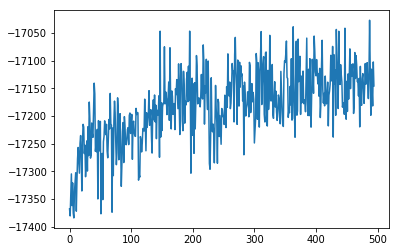

In [11]:
plt.plot(model.loglikelihoods_[5:])

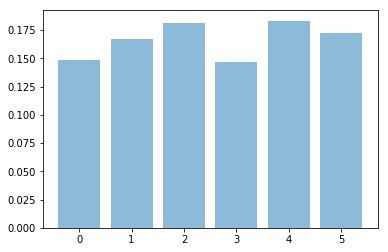

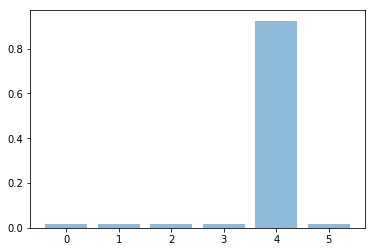

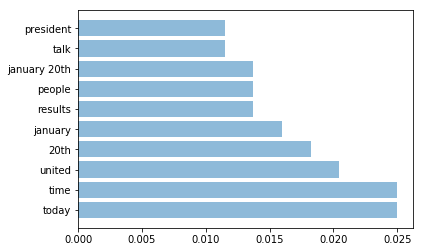

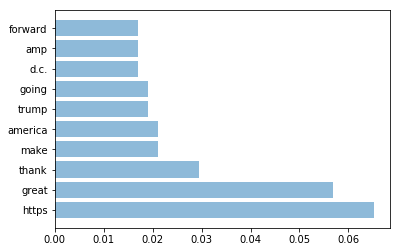

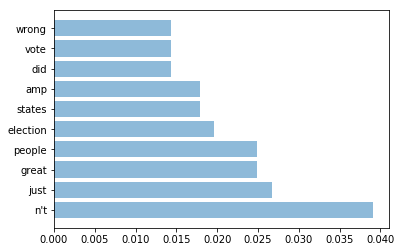

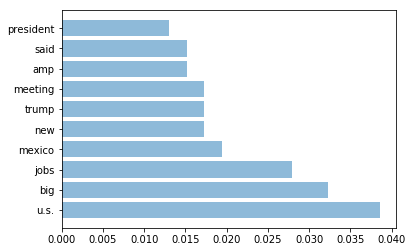

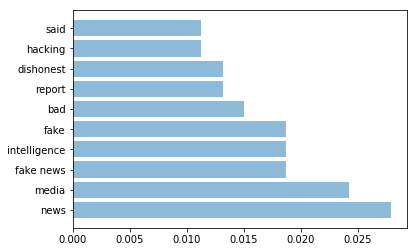

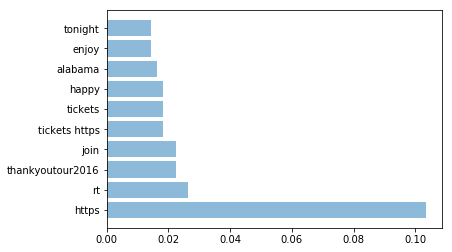

In [12]:
#Generando algunos gráficos de los resultados
from matplotlib.pylab import hist, show

y=model.doc_topic_
#distribución de tópicos en todos los documentos
dist = sum(y)/len(docs)
w=np.arange(0,true_k)
plt.bar(w,height=dist,alpha=0.5,tick_label=w)
show()

#distribución de tópicos en el documento 100
plt.bar(w,height=y[100],alpha=0.5,tick_label=w)
show()

#frecuencia de palabras por tópico
n_top_words=10
numo =np.arange(0,n_top_words)

for idx,topic in enumerate(model.topic_word_):
    d =[]
    s = []
    for i in topic.argsort()[:-n_top_words - 1:-1]:
          s.append(diccionario[i])
          d.append(topic[i])
    
    plt.barh(numo,width=d,alpha=0.5,tick_label=s)
    show()





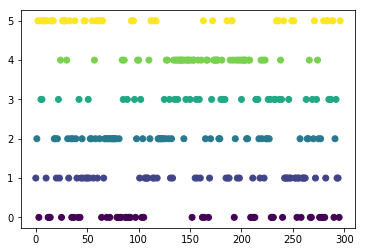

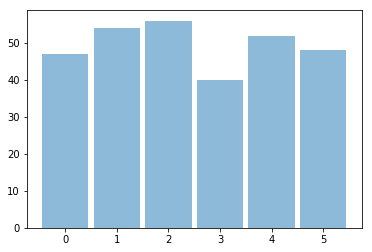

In [13]:
#calculando cluster en base al tópico mas frecuente
z=[]
for i in range(len(docs)):
    z.append(np.argmax(y[i]))
plt.scatter(range(297),z,c=z)
show()

#distribución de cluster de acuerdo a la definición anterior
hist(z,bins=np.arange(-0.5,5.6,1),alpha=0.5,rwidth=0.9)#,density=True)
show()



<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<p>Pregunta Nº7: ¿Cómo se comparan estos resultados con los anteriores? ¿Qué puede decir de la convergencia de la estimación en este caso?
</p></div>

## Respuesta:

Los tópicos son similares, una diferencia observada es una frecuancia más balanceada de cada tópico.

<div style="border: 2px solid #1c75c8; background-color: #F8B4B4">
<p>Considerando este ejemplo realice el análisis de tópicos del set de datos en speeches.csv. 
Comente sus hallazgos </p> </div>

In [14]:
speeches = pd.read_csv('datasets/speeches.csv')
speeches

,Unnamed: 0,Name,Inaugural Address,Date,text
0,4,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and of the House...
1,5,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again called upon by t...
2,6,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in early times, ..."
3,7,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CALLED upon to ...
4,8,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to that qualific..."
5,9,James Madison,First Inaugural Address,"Saturday, March 4, 1809",UNWILLING to depart from examples of the most...
6,10,James Madison,Second Inaugural Address,"Thursday, March 4, 1813",ABOUT to add the solemnity of an oath to the ...
7,11,James Monroe,First Inaugural Address,"Tuesday, March 4, 1817",I SHOULD be destitute of feeling if I was not...
8,12,James Monroe,Second Inaugural Address,"Monday, March 5, 1821",Fellow-Citizens: I SHALL not attempt to desc...
9,13,John Quincy Adams,Inaugural Address,"Friday, March 4, 1825",IN compliance with an usage coeval with the e...


In [33]:
docs = speeches["text"].as_matrix()
len(docs)

58

In [34]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import adjusted_rand_score

stemmer = SnowballStemmer("english")

# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/roberto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/roberto/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
n_true = 15
true_k = n_true

In [36]:
#Aplicando Modelos Probabilistas de Tópicos y LDA
from sklearn.decomposition import LatentDirichletAllocation

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

tf_vectorizer = CountVectorizer(max_df=0.14, min_df=2,
                                stop_words='english',tokenizer=tokenize_only, ngram_range=(1,2))
tf = tf_vectorizer.fit_transform(docs)
diccionario= tf_vectorizer.get_feature_names()


#Estimación de LDA con Bayes Variacional
lda = LatentDirichletAllocation(n_components=true_k, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

lda.fit(tf)
#Cálculo de índice de ajuste de los datos
print(lda.perplexity(tf))
print("\nTopics in LDA model:")
print_top_words(lda, diccionario, 10)

631694.3826637235

Topics in LDA model:
Topic #0: drawn lash taking care utmost ability dominate negro race pay price nobler mention sustaining constitute
Topic #1: enforcement controversies amendment contributed processes domination criminal regulation agencies public health
Topic #2: fortifications late naval coast length satisfied zeal respecting connected afforded
Topic #3: ballot european officer penalties social order near aggregate advice body people ships
Topic #4: naval british public money activity invasion connected principles government combinations governmental competency
Topic #5: army negro weapons amendment islands likely nuclear tax canal employees
Topic #6: s america s tyranny stands heritage tax ideal covenant accepted abandon
Topic #7: confederacy texas grant whilst voices authorities america 's heard supposed legislature
Topic #8: s story america s dreams new century gave nation s jurisdiction partisan world s
Topic #9: s journey creed heroes jobs speaks founding b

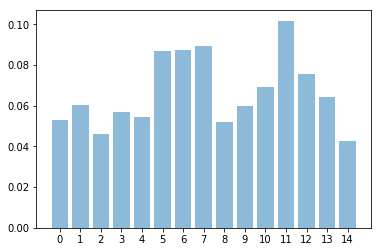

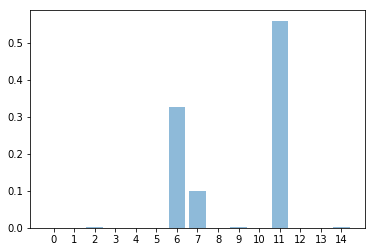

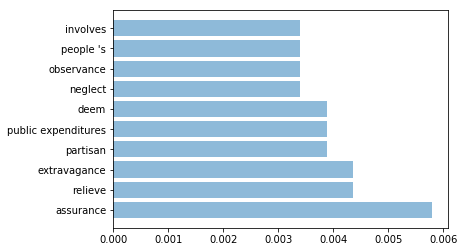

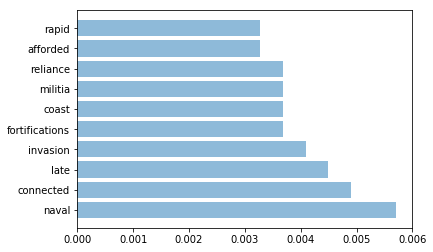

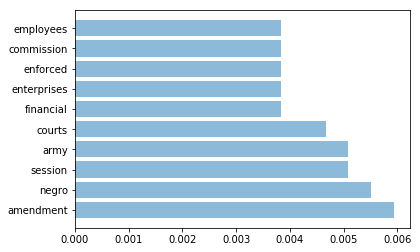

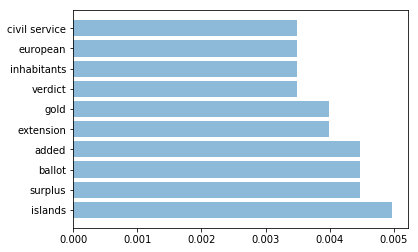

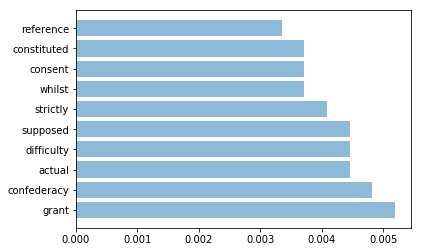

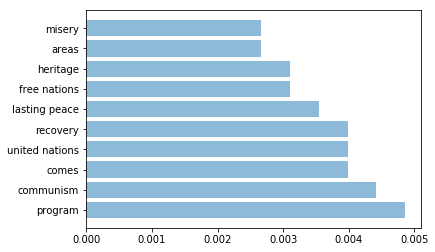

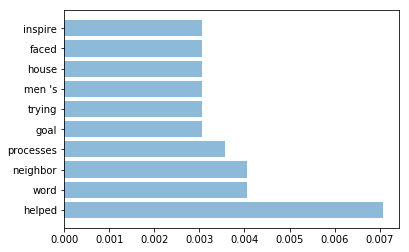

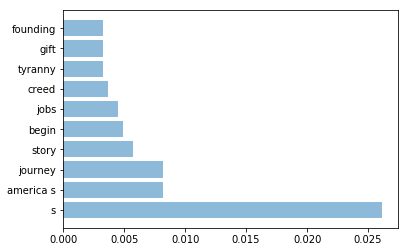

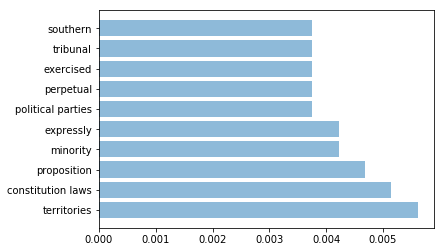

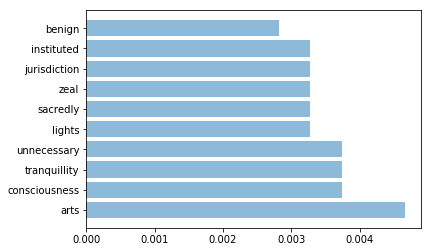

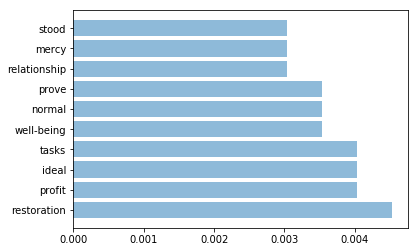

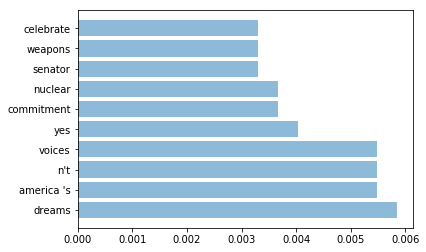

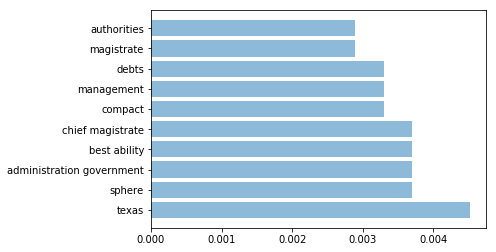

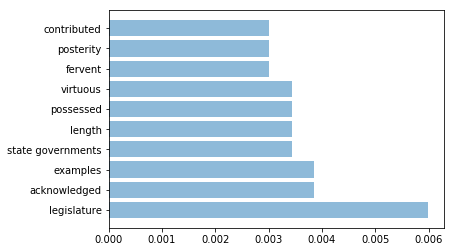

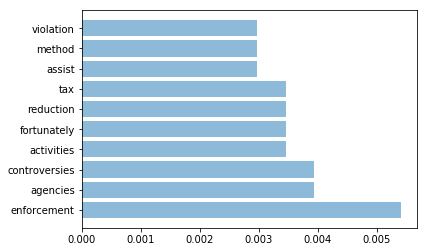

In [37]:
#Generando algunos gráficos de los resultados
from matplotlib.pylab import hist, show

y=model.doc_topic_
#distribución de tópicos en todos los documentos
dist = sum(y)/len(docs)
w=np.arange(0,true_k)
plt.bar(w,height=dist,alpha=0.5,tick_label=w)
show()

#distribución de tópicos en el documento 100
plt.bar(w,height=y[50],alpha=0.5,tick_label=w)
show()

#frecuencia de palabras por tópico
n_top_words=10
numo =np.arange(0,n_top_words)

for idx,topic in enumerate(model.topic_word_):
    d =[]
    s = []
    for i in topic.argsort()[:-n_top_words - 1:-1]:
          s.append(diccionario[i])
          d.append(topic[i])
    
    plt.barh(numo,width=d,alpha=0.5,tick_label=s)
    show()



In [38]:
import lda

model = lda.LDA(n_topics=true_k, n_iter=5000, alpha=0.1, eta=0.1, random_state=3)
model.fit(tf)  # model.fit_transform(X) is also available

topic_word = model.topic_word_  # model.components_ also works
n_top_words=10
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(diccionario)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))
    



INFO:lda:n_documents: 58
INFO:lda:vocab_size: 6675
INFO:lda:n_words: 24357
INFO:lda:n_topics: 15
INFO:lda:n_iter: 5000
/Users/roberto/anaconda3/lib/python3.6/site-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:lda:<0> log likelihood: -294203
INFO:lda:<10> log likelihood: -251619
INFO:lda:<20> log likelihood: -240790
INFO:lda:<30> log likelihood: -237953
INFO:lda:<40> log likelihood: -236797
INFO:lda:<50> log likelihood: -236455
INFO:lda:<60> log likelihood: -236248
INFO:lda:<70> log likelihood: -235165
INFO:lda:<80> log likelihood: -234826
INFO:lda:<90> log likelihood: -235059
INFO:lda:<100> log likelihood: -234981
INFO:lda:<110> log likelihood: -234903
INFO:lda:<120> log likelihood: -234857
INFO:lda:<130> log likelihood: -234919
INFO:lda:<140> log likelihood: -234645
INF

INFO:lda:<1980> log likelihood: -234995
INFO:lda:<1990> log likelihood: -235177
INFO:lda:<2000> log likelihood: -234746
INFO:lda:<2010> log likelihood: -235414
INFO:lda:<2020> log likelihood: -234952
INFO:lda:<2030> log likelihood: -235103
INFO:lda:<2040> log likelihood: -234726
INFO:lda:<2050> log likelihood: -234839
INFO:lda:<2060> log likelihood: -235138
INFO:lda:<2070> log likelihood: -235295
INFO:lda:<2080> log likelihood: -234598
INFO:lda:<2090> log likelihood: -235087
INFO:lda:<2100> log likelihood: -235027
INFO:lda:<2110> log likelihood: -234970
INFO:lda:<2120> log likelihood: -235099
INFO:lda:<2130> log likelihood: -235584
INFO:lda:<2140> log likelihood: -234812
INFO:lda:<2150> log likelihood: -234857
INFO:lda:<2160> log likelihood: -235172
INFO:lda:<2170> log likelihood: -235489
INFO:lda:<2180> log likelihood: -234790
INFO:lda:<2190> log likelihood: -234843
INFO:lda:<2200> log likelihood: -234828
INFO:lda:<2210> log likelihood: -235130
INFO:lda:<2220> log likelihood: -235335


INFO:lda:<4030> log likelihood: -235097
INFO:lda:<4040> log likelihood: -234573
INFO:lda:<4050> log likelihood: -234555
INFO:lda:<4060> log likelihood: -234891
INFO:lda:<4070> log likelihood: -235188
INFO:lda:<4080> log likelihood: -235306
INFO:lda:<4090> log likelihood: -234830
INFO:lda:<4100> log likelihood: -234660
INFO:lda:<4110> log likelihood: -235468
INFO:lda:<4120> log likelihood: -235115
INFO:lda:<4130> log likelihood: -235001
INFO:lda:<4140> log likelihood: -235115
INFO:lda:<4150> log likelihood: -235007
INFO:lda:<4160> log likelihood: -234949
INFO:lda:<4170> log likelihood: -234597
INFO:lda:<4180> log likelihood: -235206
INFO:lda:<4190> log likelihood: -235139
INFO:lda:<4200> log likelihood: -235405
INFO:lda:<4210> log likelihood: -234681
INFO:lda:<4220> log likelihood: -234785
INFO:lda:<4230> log likelihood: -234798
INFO:lda:<4240> log likelihood: -235379
INFO:lda:<4250> log likelihood: -235036
INFO:lda:<4260> log likelihood: -235020
INFO:lda:<4270> log likelihood: -235162


Topic 0: assurance relieve extravagance partisan public expenditures deem neglect observance people 's involves
Topic 1: naval connected late invasion fortifications coast militia reliance afforded rapid
Topic 2: amendment negro session army courts financial enterprises enforced commission employees
Topic 3: islands surplus ballot added extension gold verdict inhabitants european civil service
Topic 4: grant confederacy actual difficulty supposed strictly whilst consent constituted reference
Topic 5: program communism comes united nations recovery lasting peace free nations heritage areas misery
Topic 6: helped word neighbor processes goal trying men 's house faced inspire
Topic 7: s america s journey story begin jobs creed tyranny gift founding
Topic 8: territories constitution laws proposition minority expressly political parties perpetual exercised tribunal southern
Topic 9: arts consciousness tranquillity unnecessary lights sacredly zeal jurisdiction instituted benign
Topic 10: res

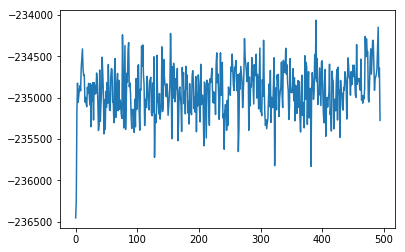

In [39]:
plt.plot(model.loglikelihoods_[5:])

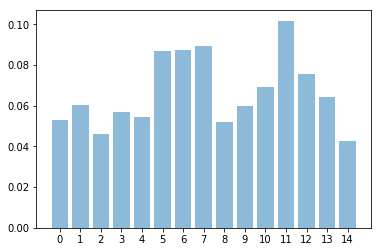

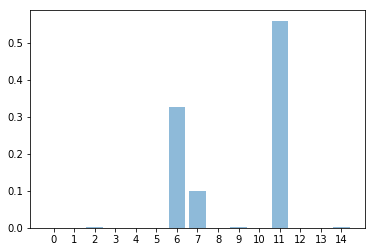

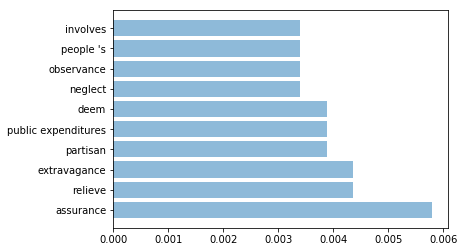

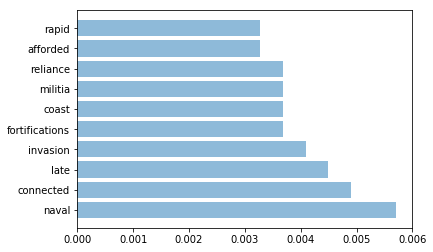

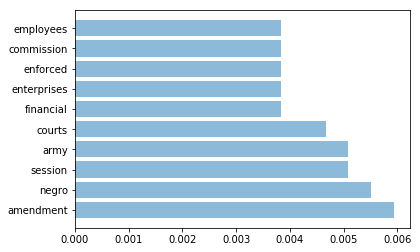

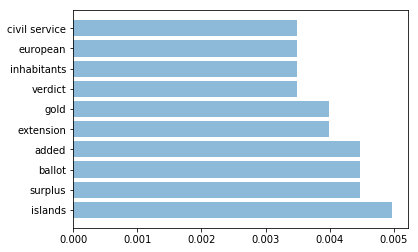

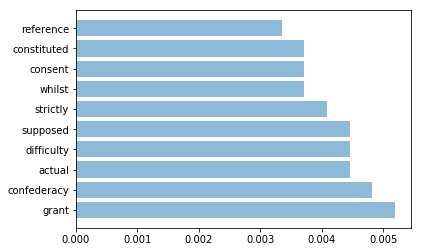

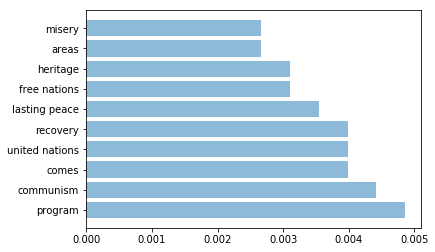

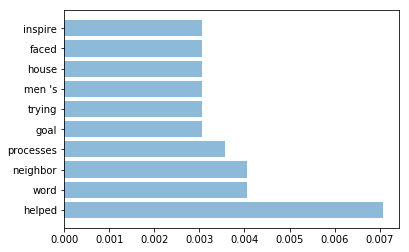

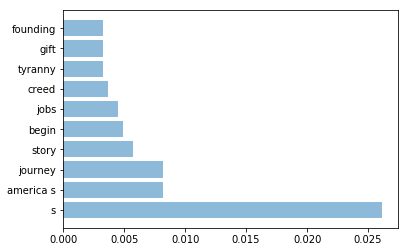

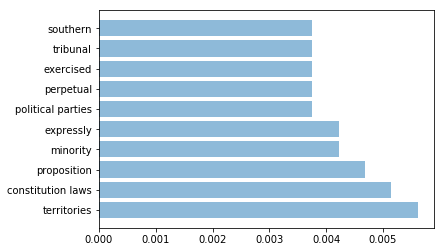

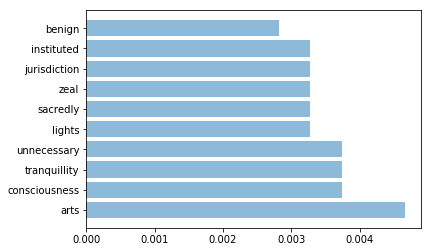

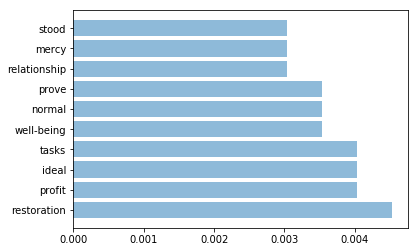

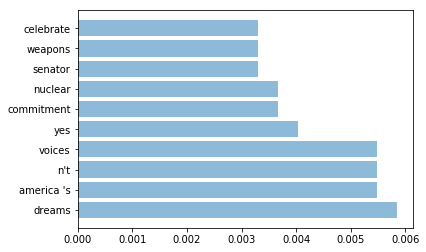

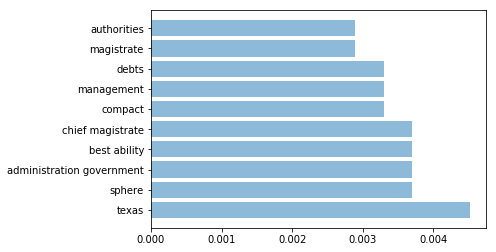

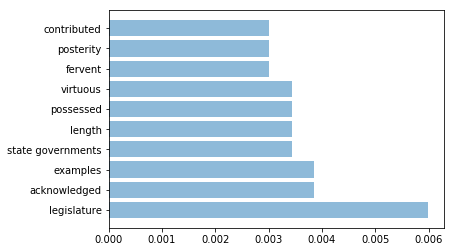

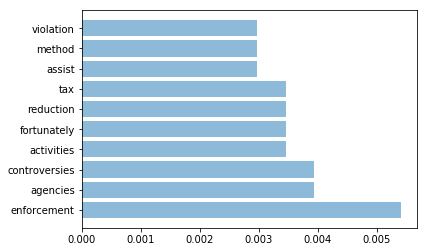

In [40]:
#Generando algunos gráficos de los resultados
from matplotlib.pylab import hist, show

y=model.doc_topic_
#distribución de tópicos en todos los documentos
dist = sum(y)/len(docs)
w=np.arange(0,true_k)
plt.bar(w,height=dist,alpha=0.5,tick_label=w)
show()

#distribución de tópicos en el documento 100
plt.bar(w,height=y[50],alpha=0.5,tick_label=w)
show()

#frecuencia de palabras por tópico
n_top_words=10
numo =np.arange(0,n_top_words)

for idx,topic in enumerate(model.topic_word_):
    d =[]
    s = []
    for i in topic.argsort()[:-n_top_words - 1:-1]:
          s.append(diccionario[i])
          d.append(topic[i])
    
    plt.barh(numo,width=d,alpha=0.5,tick_label=s)
    show()

